<a href="https://colab.research.google.com/github/rahulyad011/intrusion-detection/blob/main/SYN_DoS_Kitsune_Network_Attack_model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model
import pickle # saving and loading trained model
from os import path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# importing library for support vector machine classifier
from sklearn.svm import SVC

# MLP requirements 
from keras.layers import Dense # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.models import model_from_json # saving and loading trained model

# LSTM requirements 
from keras.layers import LSTM
from keras.layers import Input
from keras.models import Model

# evaluation metrices
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import det_curve

# representation of model layers
from keras.utils.vis_utils import plot_model

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
bin_data_total = data = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Datasets/kitsume_network_attack_dataset/SYN_DoS_dataset_kitsune_binary_data_1M.csv")
bin_data_total.drop(bin_data_total.columns[0],axis=1,inplace=True)
bin_data_total

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X108,X109,X110,X111,X112,X113,X114,X115,Unnamed: 0,label
0,76.333107,1419.317491,2.595890e+04,108.392983,1412.672436,30514.852723,281.590328,1406.932297,33629.650619,2694.618739,...,-2.151742e-08,26938.387100,1399.958296,203.810089,1401.243458,4.153855e+04,-8.081279e-12,-6.789514e-09,1763051,0.0
1,102.574606,743.297353,4.361810e+05,147.023775,741.365795,432564.091427,391.997237,740.233182,429613.799804,3896.027599,...,0.000000e+00,17014.150178,1450.000000,0.000159,1450.000000,2.514571e-08,0.000000e+00,0.000000e+00,1428500,0.0
2,108.907933,749.380285,4.359621e+05,160.008099,746.179084,433243.215768,410.643564,743.273659,429911.616559,3810.424801,...,0.000000e+00,16631.012081,1450.000000,0.000143,1450.000000,2.048910e-08,0.000000e+00,0.000000e+00,1196627,0.0
3,27.797468,60.000000,7.730705e-11,41.150494,60.000000,0.000008,112.749802,60.003076,0.406055,1120.629515,...,1.515122e-08,11260.140253,60.000000,0.000010,1404.069937,4.250931e+04,8.437822e-11,4.129299e-08,1463903,0.0
4,66.285888,725.853787,4.219272e+05,110.406678,730.923915,422325.500690,354.601578,738.359180,425616.203898,3754.039538,...,0.000000e+00,16606.193102,1450.000000,0.000078,1450.000000,6.053597e-09,0.000000e+00,0.000000e+00,1179198,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27707,45.469222,1398.683178,3.746700e+04,78.377406,1400.382237,37338.041853,251.103886,1398.719484,43846.022105,2667.104219,...,-3.827955e-08,26867.946776,1401.652466,211.560261,1402.936077,4.475774e+04,-9.969412e-11,-5.884923e-08,2688419,1.0
27708,48.397431,1378.486186,7.452352e+04,86.574726,1386.295925,67147.513719,272.504639,1393.987809,57748.701806,2695.789331,...,-3.656427e-08,26897.083858,1401.550103,212.094743,1402.833808,4.498418e+04,-1.020920e-10,-6.627472e-08,2690295,1.0
27709,47.526270,1405.991772,4.201597e+04,82.319552,1405.212742,44004.066870,260.993242,1404.910142,45097.217037,2681.244199,...,-2.052881e-08,26883.881558,1401.900236,211.835179,1403.183620,4.487414e+04,-9.489772e-11,-9.794758e-08,2708524,1.0
27710,55.384816,1403.249422,4.820476e+04,93.537942,1404.675162,46407.952434,274.518804,1403.926862,45771.374742,2694.088860,...,-1.391181e-08,26897.820471,1401.906384,211.499285,1403.189763,4.473195e+04,-9.820531e-11,-9.041219e-08,2701715,1.0


In [4]:
# distribution of label class before sampling
data_size = bin_data_total.shape[0]
# data_size
bin_data_total.label.value_counts()/data_size

0.0    0.997474
1.0    0.002526
Name: label, dtype: float64

In [5]:
model_name_suffix = "_kitsune_SYN_DoS"

In [6]:
# numeric feature normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

numeric_cols = bin_data_total.select_dtypes(['number']).columns
numeric_cols = numeric_cols.drop('label')
flag = 0
scaler = None
if flag:
  # using standard scaler for normalizing
  scaler = StandardScaler()
else:
  # using minmax scaler for normalizing
  # to avoid negative values after scaling
  scaler = MinMaxScaler()

def normalization_train(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = scaler.fit_transform(arr.reshape(len(arr),1))
  return df

def normalization_test(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = scaler.transform(arr.reshape(len(arr),1))
  return df

# numeric_cols

In [7]:
# sampling data taking only 50% of the data
# bin_data = bin_data_total.groupby('label', group_keys=False).apply(lambda x: x.sample(frac=0.5))
bin_data = bin_data_total
bin_data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X108,X109,X110,X111,X112,X113,X114,X115,Unnamed: 0,label
0,76.333107,1419.317491,2.595890e+04,108.392983,1412.672436,30514.852723,281.590328,1406.932297,33629.650619,2694.618739,...,-2.151742e-08,26938.387100,1399.958296,203.810089,1401.243458,4.153855e+04,-8.081279e-12,-6.789514e-09,1763051,0.0
1,102.574606,743.297353,4.361810e+05,147.023775,741.365795,432564.091427,391.997237,740.233182,429613.799804,3896.027599,...,0.000000e+00,17014.150178,1450.000000,0.000159,1450.000000,2.514571e-08,0.000000e+00,0.000000e+00,1428500,0.0
2,108.907933,749.380285,4.359621e+05,160.008099,746.179084,433243.215768,410.643564,743.273659,429911.616559,3810.424801,...,0.000000e+00,16631.012081,1450.000000,0.000143,1450.000000,2.048910e-08,0.000000e+00,0.000000e+00,1196627,0.0
3,27.797468,60.000000,7.730705e-11,41.150494,60.000000,0.000008,112.749802,60.003076,0.406055,1120.629515,...,1.515122e-08,11260.140253,60.000000,0.000010,1404.069937,4.250931e+04,8.437822e-11,4.129299e-08,1463903,0.0
4,66.285888,725.853787,4.219272e+05,110.406678,730.923915,422325.500690,354.601578,738.359180,425616.203898,3754.039538,...,0.000000e+00,16606.193102,1450.000000,0.000078,1450.000000,6.053597e-09,0.000000e+00,0.000000e+00,1179198,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27707,45.469222,1398.683178,3.746700e+04,78.377406,1400.382237,37338.041853,251.103886,1398.719484,43846.022105,2667.104219,...,-3.827955e-08,26867.946776,1401.652466,211.560261,1402.936077,4.475774e+04,-9.969412e-11,-5.884923e-08,2688419,1.0
27708,48.397431,1378.486186,7.452352e+04,86.574726,1386.295925,67147.513719,272.504639,1393.987809,57748.701806,2695.789331,...,-3.656427e-08,26897.083858,1401.550103,212.094743,1402.833808,4.498418e+04,-1.020920e-10,-6.627472e-08,2690295,1.0
27709,47.526270,1405.991772,4.201597e+04,82.319552,1405.212742,44004.066870,260.993242,1404.910142,45097.217037,2681.244199,...,-2.052881e-08,26883.881558,1401.900236,211.835179,1403.183620,4.487414e+04,-9.489772e-11,-9.794758e-08,2708524,1.0
27710,55.384816,1403.249422,4.820476e+04,93.537942,1404.675162,46407.952434,274.518804,1403.926862,45771.374742,2694.088860,...,-1.391181e-08,26897.820471,1401.906384,211.499285,1403.189763,4.473195e+04,-9.820531e-11,-9.041219e-08,2701715,1.0


In [8]:
number_of_cols = bin_data.shape[1]

In [9]:
# distribution of label class after sampling
data_size = bin_data.shape[0]
bin_data.label.value_counts()/data_size

0.0    0.997474
1.0    0.002526
Name: label, dtype: float64

In [10]:
model_selection = {
    0 : "ALL",
    2 : "MLP",
    3 : "LSTM",
    4 : "AE"
}
model_flag = 0
svm_enable = 1

In [11]:
X = bin_data.iloc[:,0:number_of_cols] # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = bin_data['label'] # target attribute

In [12]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42) 

In [13]:
# calling the normalization() function
X_train = normalization_train(X_train,numeric_cols)
X_train.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X108,X109,X110,X111,X112,X113,X114,X115,Unnamed: 0,label
24525,0.166088,0.426967,0.882415,0.256099,0.444692,0.899292,0.358886,0.461569,0.866489,0.485165,...,0.000054,0.585702,0.088290,5.604445e-01,0.088290,3.140981e-01,6.501300e-09,0.000339,0.712519,0.0
11764,0.194174,0.958824,0.144485,0.297001,0.962765,0.134833,0.386147,0.963423,0.124932,0.487680,...,0.000059,0.996603,0.963025,6.177378e-01,0.963950,3.816000e-01,6.919471e-09,0.000343,0.742928,0.0
24215,0.225351,0.500753,0.944781,0.365064,0.497962,0.955164,0.514135,0.494302,0.908349,0.688496,...,0.000054,0.634490,1.000000,5.268711e-07,1.000000,2.775932e-13,6.501300e-09,0.000339,0.548021,0.0
18937,0.257396,0.466428,0.937111,0.347835,0.467967,0.935284,0.404981,0.472282,0.879686,0.498251,...,0.000054,0.597865,0.110179,7.756083e-01,0.110179,6.015683e-01,6.501300e-09,0.000339,0.414784,0.0
25311,0.113221,0.373419,0.818122,0.174033,0.397958,0.853442,0.253070,0.427303,0.848512,0.351163,...,0.000054,0.451264,0.090169,6.033182e-01,0.090169,3.639929e-01,6.501300e-09,0.000339,0.614001,0.0


In [14]:
# calling the normalization() function
X_test = normalization_test(X_test,numeric_cols)
X_test.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X108,X109,X110,X111,X112,X113,X114,X115,Unnamed: 0,label
2501,-0.000022,0.000222,0.147561,-0.000008,0.000221,0.148807,5.872979e-05,0.000221,0.149956,0.000959,...,-0.000042,0.005808,0.000036,0.000063,0.000036,0.030101,-0.000042,-0.000042,0.374770,0.0
21252,-0.000025,0.000213,0.144975,-0.000012,0.000216,0.146701,5.361978e-05,0.000217,0.148356,0.000936,...,-0.000042,0.005716,0.000030,0.000047,0.000030,0.021790,-0.000042,-0.000042,0.490268,0.0
23503,-0.000032,-0.000020,-0.000042,-0.000026,-0.000020,-0.000042,-2.583800e-07,-0.000020,-0.000042,0.000354,...,-0.000042,0.003979,-0.000020,-0.000042,0.000465,0.015762,-0.000042,-0.000042,0.888125,0.0
26828,-0.000021,0.000222,0.149629,-0.000007,0.000221,0.150281,5.920887e-05,0.000219,0.150228,0.000951,...,-0.000042,0.005779,0.000033,0.000055,0.000033,0.025986,-0.000042,-0.000042,0.300443,0.0
18210,-0.000032,0.000174,0.129448,-0.000024,0.000186,0.134400,2.334777e-05,0.000198,0.141187,0.000672,...,-0.000042,0.004365,0.000025,0.000036,0.000025,0.016666,-0.000042,-0.000042,0.682861,0.0


## **Linear Support Vector Machine Classifier (Binary Classification) **
to enable make the svm_enable = 1 in the above cell

In [15]:
if svm_enable:
  # using kernel as linear 
  lsvm = SVC(kernel='linear',gamma='auto') 
  lsvm.fit(X_train,y_train) # training model on training dataset

In [16]:
if svm_enable:
  pkl_filename = "/content/drive/MyDrive/Colab_Notebooks/Models/lsvm_binary"+model_name_suffix+".pkl"
  if (not path.isfile(pkl_filename)):
    # saving the trained model to disk
    with open(pkl_filename, 'wb') as file:
      pickle.dump(lsvm, file)
    print("Saved model to disk")
    # loading the trained model from disk
    with open(pkl_filename, 'rb') as file:
      lsvm = pickle.load(file)
    print("Loaded model from disk") 

Saved model to disk
Loaded model from disk


In [17]:
if svm_enable:
  y_pred = lsvm.predict(X_test) # predicting target attribute on testing dataset
  ac = accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
  print("LSVM-Classifier Binary Set-Accuracy is ", ac)

LSVM-Classifier Binary Set-Accuracy is  99.92782909930716


In [18]:
# import matplotlib.pyplot as plt
# from sklearn.datasets import make_classification
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# from sklearn.model_selection import train_test_split
# from sklearn.svm import SVC
# X, y = make_classification(random_state=0)
# X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                     random_state=0)
# cm = confusion_matrix(y_test, y_pred, labels=lsvm.classes_)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,
#                               display_labels=lsvm.classes_)
# disp.plot()

# plt.show()

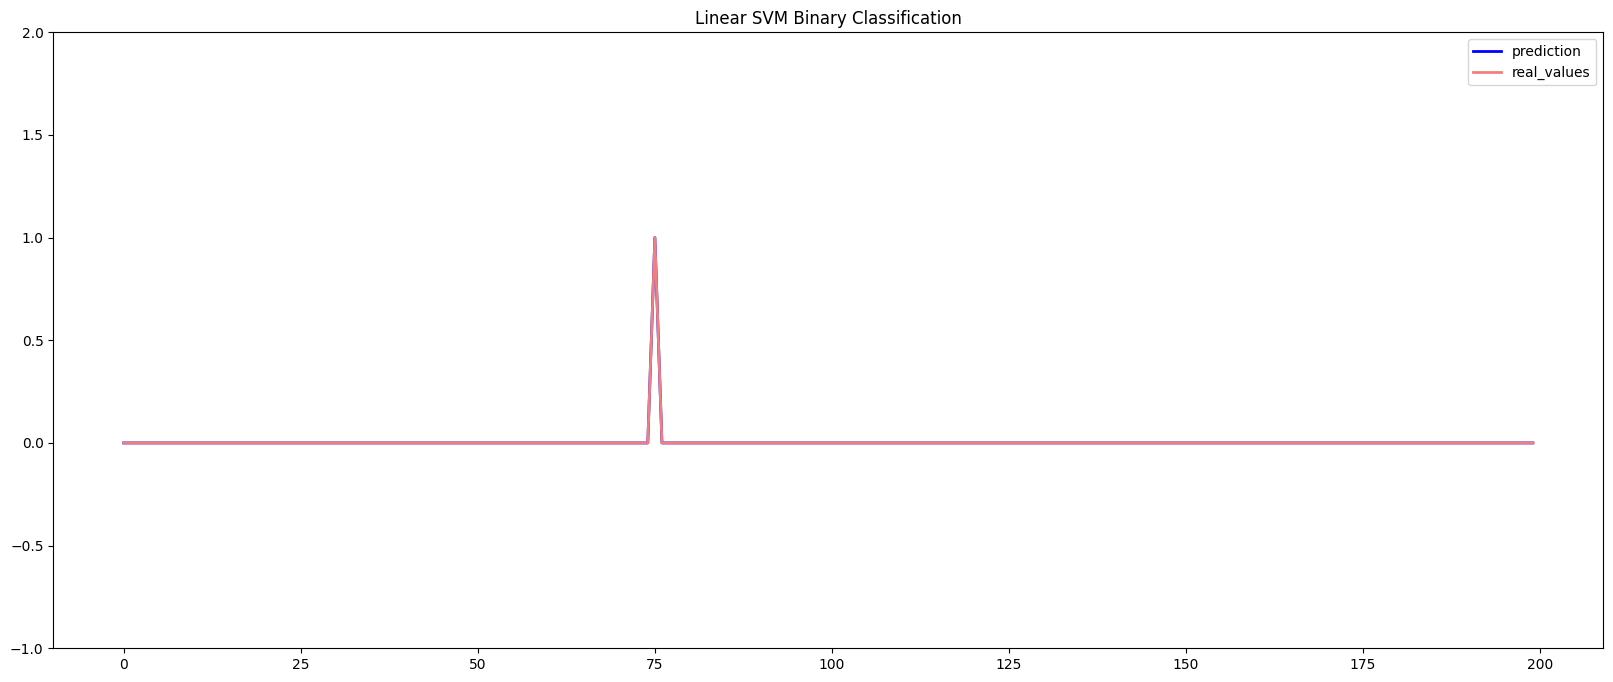

In [19]:
if svm_enable:
  plt.figure(figsize=(20,8))
  plt.plot(y_pred[300:500], label="prediction", linewidth=2.0,color='blue')
  plt.plot(y_test[300:500].values, label="real_values", linewidth=2.0,color='lightcoral')
  plt.legend(loc="best")
  plt.ylim((-1,2))
  plt.title("Linear SVM Binary Classification")
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/lsvm_real_pred_bin.png')
  plt.show()

In [20]:
if svm_enable:
  target_names = ['class 0', 'class 1']
  print(classification_report(y_test, y_pred, target_names=target_names))
  fpr, fnr, thresholds = det_curve(y_test, y_pred)
  print("False Positive Rate - ", fpr)
  print("False Negative Rate - ", fnr)
  print("Thresholds - ", thresholds)

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00      6910
     class 1       0.93      0.78      0.85        18

    accuracy                           1.00      6928
   macro avg       0.97      0.89      0.92      6928
weighted avg       1.00      1.00      1.00      6928

False Positive Rate -  [1.000000e+00 1.447178e-04]
False Negative Rate -  [0.         0.22222222]
Thresholds -  [0. 1.]


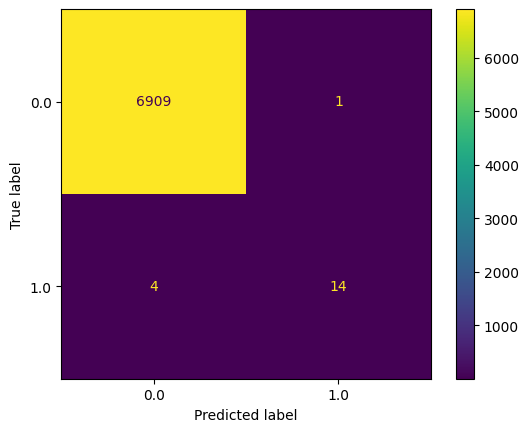

In [21]:
if svm_enable:
  from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

  clf = lsvm
  cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=clf.classes_)
  disp.plot()

  plt.show()

## **Multi Layer Perceptron Classifier (Binary Classification)**

In [22]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  mlp = Sequential() # creating model

  # adding input layer and first layer with 50 neurons
  mlp.add(Dense(units=50, input_dim=X_train.shape[1], activation='relu'))
  # output layer with sigmoid activation
  mlp.add(Dense(units=1,activation='sigmoid'))

In [23]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # defining loss function, optimizer, metrics and then compiling model
  mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # summary of model layers
  mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                5900      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 5,951
Trainable params: 5,951
Non-trainable params: 0
_________________________________________________________________


In [25]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # training the model on training dataset
  history = mlp.fit(X_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

Epoch 1/100
4/4 [==============================] - 6s 135ms/step - loss: 0.7049 - accuracy: 0.5219 - val_loss: 0.3994 - val_accuracy: 0.9127
Epoch 2/100
4/4 [==============================] - 0s 15ms/step - loss: 0.3223 - accuracy: 0.9401 - val_loss: 0.1904 - val_accuracy: 0.9964
Epoch 3/100
4/4 [==============================] - 0s 16ms/step - loss: 0.1559 - accuracy: 0.9978 - val_loss: 0.1031 - val_accuracy: 0.9964
Epoch 4/100
4/4 [==============================] - 0s 14ms/step - loss: 0.0858 - accuracy: 0.9978 - val_loss: 0.0660 - val_accuracy: 0.9964
Epoch 5/100
4/4 [==============================] - 0s 20ms/step - loss: 0.0547 - accuracy: 0.9978 - val_loss: 0.0489 - val_accuracy: 0.9964
Epoch 6/100
4/4 [==============================] - 0s 18ms/step - loss: 0.0398 - accuracy: 0.9978 - val_loss: 0.0405 - val_accuracy: 0.9964
Epoch 7/100
4/4 [==============================] - 0s 21ms/step - loss: 0.0321 - accuracy: 0.9978 - val_loss: 0.0362 - val_accuracy: 0.9964
Epoch 8/100
4/4 [==

In [26]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  filepath = '/content/drive/MyDrive/Colab_Notebooks/Models/mlp_binary'+model_name_suffix+'.json'
  weightspath = '/content/drive/MyDrive/Colab_Notebooks/Weights/mlp_binary'+model_name_suffix+'.h5'
  if (not path.isfile(filepath)):
    # serialize model to JSON
    mlp_json = mlp.to_json()
    with open(filepath, "w") as json_file:
      json_file.write(mlp_json)

    # serialize weights to HDF5
    mlp.save_weights(weightspath)
    print("Saved model to disk")

    # load json and create model
    json_file = open(filepath, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    mlp = model_from_json(loaded_model_json)

    # load weights into new model
    mlp.load_weights(weightspath)
    print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [27]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # defining loss function, optimizer, metrics and then compiling model
  mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # predicting target attribute on testing dataset
  test_results = mlp.evaluate(X_test, y_test, verbose=1)
  print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}')

217/217 [==============================] - 1s 2ms/step - loss: 7859001.5000 - accuracy: 0.2607
Test results - Loss: 7859001.5 - Accuracy: 26.068130135536194


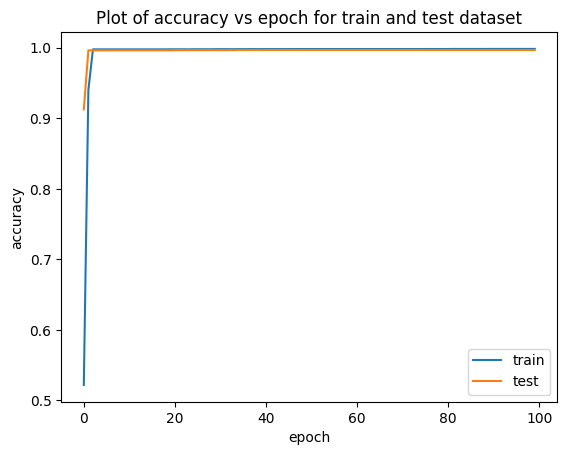

In [29]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":  
  # Plot of accuracy vs epoch of train and test dataset
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title("Plot of accuracy vs epoch for train and test dataset")
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/mlp_binary_accuracy.png')
  plt.show()

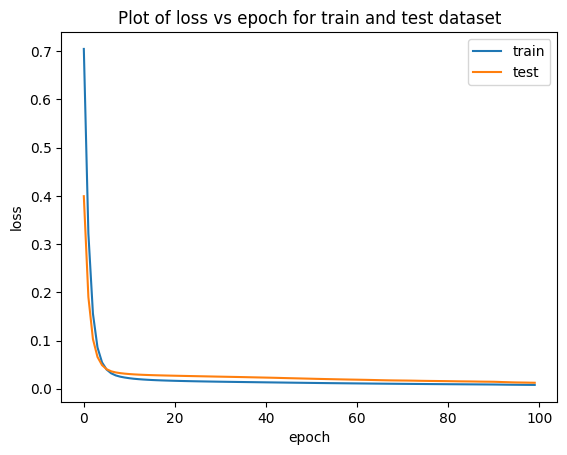

In [30]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # Plot of loss vs epoch of train and test dataset
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Plot of loss vs epoch for train and test dataset')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/mlp_binary_loss.png')
  plt.show()

In [31]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # representation of model layers
  from keras.utils.vis_utils import plot_model
  plot_model(mlp, to_file='/content/drive/MyDrive/Colab_Notebooks/Plots/mlp_binary.png', show_shapes=True,)

In [32]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  y_pred = mlp.predict(X_test).ravel()
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  auc = auc(fpr, tpr)

217/217 [==============================] - 1s 2ms/step


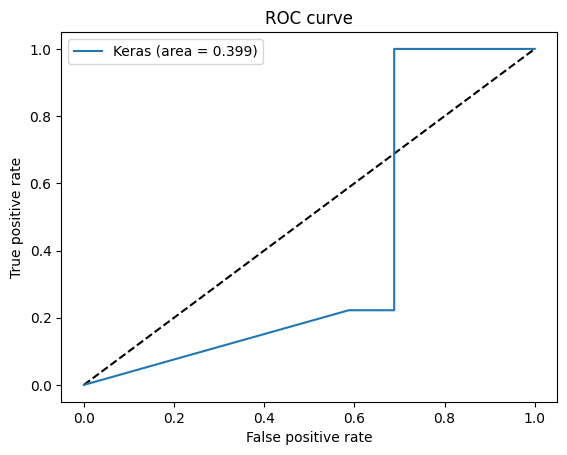

In [33]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.title('ROC curve')
  plt.legend(loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/mlp_binary_roc.png')
  plt.show()

In [34]:
# real_data_kdd = bin_data.copy()

# # Names of the columns that are discrete
# cat_cols = real_data_kdd.select_dtypes(['object']).columns
# # cat_cols
# test_data = real_data_kdd.iloc[:999]

# corr= test_data.corr()
# corr_y = abs(corr['label'])
# highest_corr = corr_y
# highest_corr.sort_values(ascending=True)

In [35]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  y_classes = (mlp.predict(X_test)>0.5).astype('int32')

217/217 [==============================] - 0s 2ms/step


In [36]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  print("Recall Score - ",recall_score(y_test,y_classes))
  print("F1 Score - ",f1_score(y_test,y_classes))
  print("Precision Score - ",precision_score(y_test,y_classes))
  fpr, fnr, thresholds = det_curve(y_test, y_classes)
  print("False Positive Rate - ", fpr)
  print("False Negative Rate - ", fnr)
  print("Thresholds - ", thresholds)

Recall Score -  1.0
F1 Score -  0.006979449398991857
Precision Score -  0.003501945525291829
False Positive Rate -  [0.74124457]
False Negative Rate -  [0.]
Thresholds -  [1]


              precision    recall  f1-score   support

           0       1.00      0.26      0.41      6910
           1       0.00      1.00      0.01        18

    accuracy                           0.26      6928
   macro avg       0.50      0.63      0.21      6928
weighted avg       1.00      0.26      0.41      6928



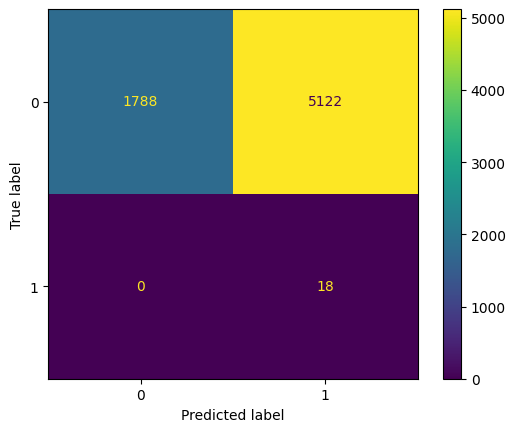

In [37]:
print(classification_report(y_test, y_classes, target_names=['0', '1']))
cm = confusion_matrix(y_test, y_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['0', '1'])
disp.plot()

plt.show()

# **Correlation** Matrix of Features

In [38]:
corr= bin_data.corr()
corr_y = abs(corr['label'])
highest_corr = corr_y[corr_y >0.3]
highest_corr.sort_values(ascending=True)

X76      0.319342
X77      0.321325
X80      0.341227
X79      0.345461
label    1.000000
Name: label, dtype: float64

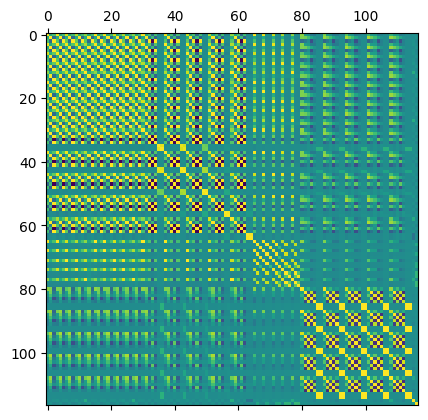

In [39]:
plt.matshow(corr)
plt.show()

## **LSTM Classifier**

In [40]:
X_train = np.array(X_train)
X_test = np.array(X_test)
# y_train.shape   #(18896,)
X_train.shape

(20784, 117)

In [41]:
y_train = np.array(y_train)
type(y_train)

numpy.ndarray

In [42]:
x_train = np.reshape(X_train, (X_train.shape[0],1,X_train.shape[1]))
x_train.shape

(20784, 1, 117)

In [43]:
x_train.shape[2]

117

In [44]:
x_test = np.reshape(X_test, (X_test.shape[0],1,X_test.shape[1]))
x_test.shape

(6928, 1, 117)

In [45]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  lst = Sequential()
  # input layer and LSTM layer with 50 neurons
  input_features = x_train.shape[2]
  lst.add(LSTM(50,input_dim=input_features))

  # outpute layer with sigmoid activation
  lst.add(Dense(1,activation='sigmoid'))

In [46]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # defining loss function, optimizer, metrics and then compiling model
  lst.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [47]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # summary of model layers
  lst.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                33600     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 33,651
Trainable params: 33,651
Non-trainable params: 0
_________________________________________________________________


In [48]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # training the model on training dataset
  history = lst.fit(x_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

Epoch 1/100
4/4 [==============================] - 3s 157ms/step - loss: 0.5711 - accuracy: 0.9095 - val_loss: 0.4368 - val_accuracy: 0.9959
Epoch 2/100
4/4 [==============================] - 0s 14ms/step - loss: 0.3883 - accuracy: 0.9977 - val_loss: 0.2902 - val_accuracy: 0.9964
Epoch 3/100
4/4 [==============================] - 0s 18ms/step - loss: 0.2567 - accuracy: 0.9978 - val_loss: 0.1939 - val_accuracy: 0.9964
Epoch 4/100
4/4 [==============================] - 0s 14ms/step - loss: 0.1719 - accuracy: 0.9978 - val_loss: 0.1351 - val_accuracy: 0.9964
Epoch 5/100
4/4 [==============================] - 0s 15ms/step - loss: 0.1202 - accuracy: 0.9978 - val_loss: 0.0997 - val_accuracy: 0.9964
Epoch 6/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0887 - accuracy: 0.9978 - val_loss: 0.0780 - val_accuracy: 0.9964
Epoch 7/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0689 - accuracy: 0.9978 - val_loss: 0.0642 - val_accuracy: 0.9964
Epoch 8/100
4/4 [==

In [49]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  filepath = '/content/drive/MyDrive/Colab_Notebooks/Models/lst_binary_kitsune'+model_name_suffix+'.json'
  weightspath = '/content/drive/MyDrive/Colab_Notebooks/Weights/lst_binary_kitsune'+model_name_suffix+'.h5'
  if (not path.isfile(filepath)):
    # serialize model to JSON
    lst_json = lst.to_json()
    with open(filepath, "w") as json_file:
      json_file.write(lst_json)

    # serialize weights to HDF5
    lst.save_weights(weightspath)
    print("Saved model to disk")

    # load json and create model
    json_file = open(filepath, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    lst = model_from_json(loaded_model_json)

    # load weights into new model
    lst.load_weights(weightspath)
    print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [50]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # load json and create model
  json_file = open(filepath, 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  lst = model_from_json(loaded_model_json)

  # load weights into new model
  lst.load_weights(weightspath)
  print("Loaded model from disk")

Loaded model from disk


In [51]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # defining loss function, optimizer, metrics and then compiling model
  lst.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [52]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # predicting target attribute on testing dataset
  test_results = lst.evaluate(x_test, y_test, verbose=1)
  print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

217/217 [==============================] - 1s 3ms/step - loss: 2.4945 - accuracy: 0.2089
Test results - Loss: 2.494471788406372 - Accuracy: 20.88625878095627%


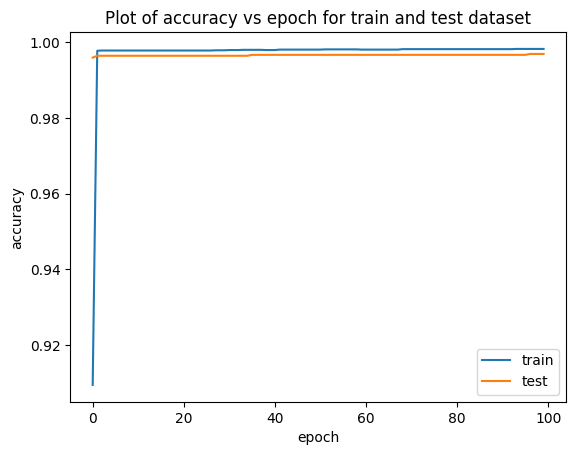

In [53]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # Plot of accuracy vs epoch of train and test dataset
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title("Plot of accuracy vs epoch for train and test dataset")
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/lstm_binary_accuracy.png')
  plt.show()

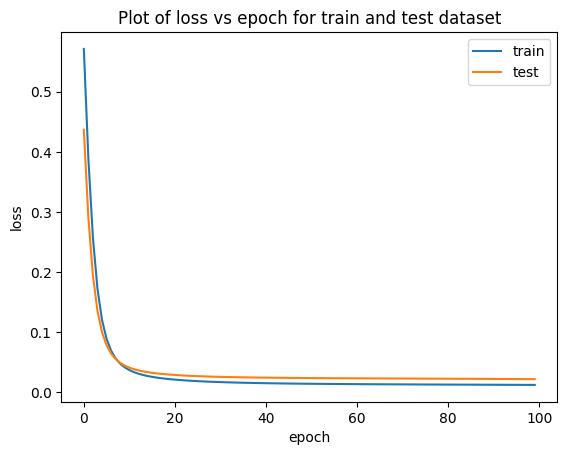

In [54]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # Plot of loss vs epoch of train and test dataset
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title("Plot of loss vs epoch for train and test dataset")
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/lstm_binary_loss.png')
  plt.show()

In [55]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # representation of model layers
  plot_model(lst, to_file='/content/drive/MyDrive/Colab_Notebooks/Plots/lstm_binary.png', show_shapes=True,)

In [56]:
y_test = np.array(y_test)
y_test.shape

(6928,)

In [57]:
type(y_test)

numpy.ndarray

In [58]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  y_classes = (lst.predict(x_test)>0.5).astype('int32')

217/217 [==============================] - 1s 2ms/step


In [59]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  print("Recall Score - ",recall_score(y_test,y_classes))
  print("F1 Score - ",f1_score(y_test,y_classes))
  print("Precision Score - ",precision_score(y_test,y_classes))
  fpr, fnr, thresholds = det_curve(y_test, y_classes)
  print("False Positive Rate - ", fpr)
  print("False Negative Rate - ", fnr)
  print("Thresholds - ", thresholds)

Recall Score -  1.0
F1 Score -  0.0065252854812398045
Precision Score -  0.0032733224222585926
False Positive Rate -  [0.79319826]
False Negative Rate -  [0.]
Thresholds -  [1]


              precision    recall  f1-score   support

           0       1.00      0.21      0.34      6910
           1       0.00      1.00      0.01        18

    accuracy                           0.21      6928
   macro avg       0.50      0.60      0.17      6928
weighted avg       1.00      0.21      0.34      6928



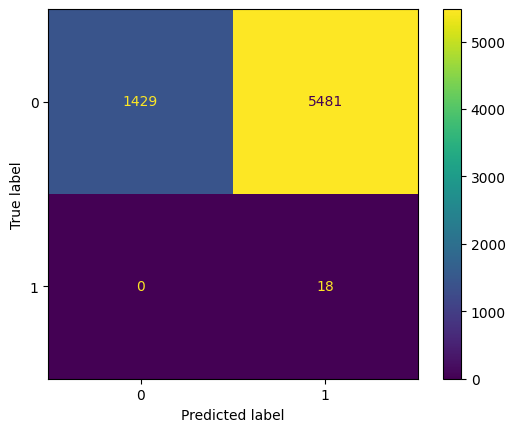

In [60]:
print(classification_report(y_test, y_classes, target_names=['0', '1']))
cm = confusion_matrix(y_test, y_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['0', '1'])
disp.plot()

plt.show()

## **Auto Encoder**

In [61]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # splitting the dataset 75% for training and 25% testing
  X_train, X_test = train_test_split(bin_data, test_size=0.25, random_state=42)

In [62]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # dataset excluding target attribute (encoded, one-hot-encoded,original)
  X_train = X_train.drop(['label'],axis=1) 

  y_test = X_test['label'] # target attribute

  # dataset excluding target attribute (encoded, one-hot-encoded,original)
  X_test = X_test.drop(['label'],axis=1)
  # calling the normalization() function
  X_train = normalization_train(X_train,numeric_cols)
  X_test = normalization_test(X_test,numeric_cols)
  X_train = X_train.values
  X_test = X_test.values
  y_test = y_test.values

In [63]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  input_dim = X_train.shape[1]
  encoding_dim = 50

  #input layer
  input_layer = Input(shape=(input_dim, ))
  #encoding layer with 50 neurons
  encoder = Dense(encoding_dim, activation="relu")(input_layer)           
  #decoding and output layer
  output_layer = Dense(input_dim, activation='softmax')(encoder)

In [64]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # creating model with input, encoding, decoding, output layers
  autoencoder = Model(inputs=input_layer, outputs=output_layer)

  # defining loss function, optimizer, metrics and then compiling model
  autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [65]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # summary of model layers
  autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 116)]             0         
                                                                 
 dense_3 (Dense)             (None, 50)                5850      
                                                                 
 dense_4 (Dense)             (None, 116)               5916      
                                                                 
Total params: 11,766
Trainable params: 11,766
Non-trainable params: 0
_________________________________________________________________


In [66]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # training the model on training dataset
  history = autoencoder.fit(X_train, X_train, epochs=100,batch_size=500,validation_data=(X_test, X_test)).history

Epoch 1/100
42/42 [==============================] - 1s 8ms/step - loss: 0.2971 - accuracy: 0.0840 - val_loss: 321933568638976000.0000 - val_accuracy: 0.0000e+00
Epoch 2/100
42/42 [==============================] - 0s 4ms/step - loss: 0.2932 - accuracy: 0.1025 - val_loss: 321933568638976000.0000 - val_accuracy: 0.0000e+00
Epoch 3/100
42/42 [==============================] - 0s 5ms/step - loss: 0.2916 - accuracy: 0.0658 - val_loss: 321933568638976000.0000 - val_accuracy: 0.0000e+00
Epoch 4/100
42/42 [==============================] - 0s 4ms/step - loss: 0.2912 - accuracy: 0.0639 - val_loss: 321933568638976000.0000 - val_accuracy: 0.0000e+00
Epoch 5/100
42/42 [==============================] - 0s 4ms/step - loss: 0.2910 - accuracy: 0.1071 - val_loss: 321933568638976000.0000 - val_accuracy: 0.0000e+00
Epoch 6/100
42/42 [==============================] - 0s 4ms/step - loss: 0.2910 - accuracy: 0.1089 - val_loss: 321933568638976000.0000 - val_accuracy: 0.0000e+00
Epoch 7/100
42/42 [=========

In [67]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  filepath = '/content/drive/MyDrive/Colab_Notebooks/Models/ae_binary'+model_name_suffix+'.json'
  weightspath = '/content/drive/MyDrive/Colab_Notebooks/Weights/ae_binary'+model_name_suffix+'.h5'
  if (not path.isfile(filepath)): 
    # serialize model to JSON
    autoencoder_json = autoencoder.to_json()
    with open(filepath, "w") as json_file:
      json_file.write(autoencoder_json)

    # serialize weights to HDF5
    autoencoder.save_weights(weightspath)
    print("Saved model to disk")

    # load json and create model
    json_file = open(filepath, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    autoencoder = model_from_json(loaded_model_json)

    # load weights into new model
    autoencoder.load_weights(weightspath)
    print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [68]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # defining loss function, optimizer, metrics and then compiling model
  autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [69]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # predicting target attribute on testing dataset
  test_results = autoencoder.evaluate(X_test, X_test, verbose=1)
  print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

217/217 [==============================] - 1s 2ms/step - loss: 321933499919499264.0000 - accuracy: 0.2034
Test results - Loss: 3.2193349991949926e+17 - Accuracy: 0.2033776044845581%


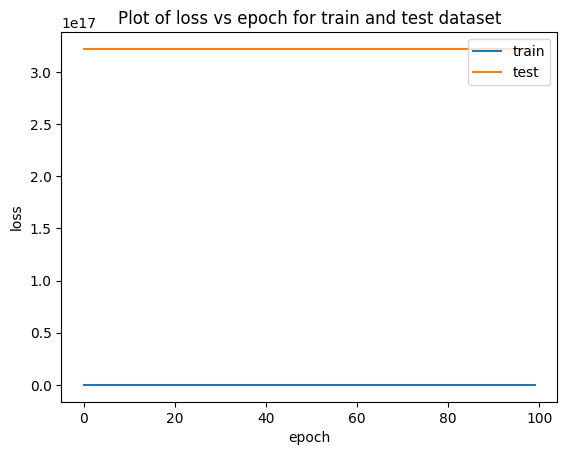

In [70]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # Plot of loss vs epoch of train and test dataset
  plt.plot(history['loss'])
  plt.plot(history['val_loss'])
  plt.title("Plot of loss vs epoch for train and test dataset")
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper right')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/ae_binary_loss.png')
  plt.show()

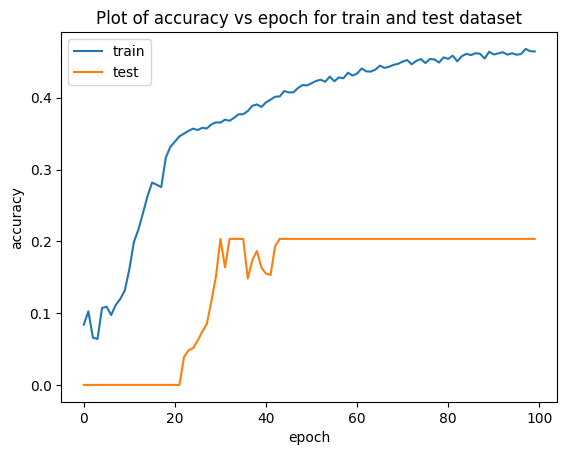

In [71]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # Plot of accuracy vs epoch of train and test dataset
  plt.plot(history['accuracy'])
  plt.plot(history['val_accuracy'])
  plt.title("Plot of accuracy vs epoch for train and test dataset")
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/ae_binary_accuracy.png')
  plt.show()

In [72]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # representation of model layers
  plot_model(autoencoder, to_file='/content/drive/MyDrive/Colab_Notebooks/Plots/ae_binary.png', show_shapes=True,)

In [73]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # calculating reconstruction error 
  predictions = autoencoder.predict(X_test)

217/217 [==============================] - 0s 2ms/step


In [74]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  mse = np.mean(np.power(X_test - predictions, 2), axis=1)
  error_df = pd.DataFrame({'reconstruction_error': mse,
                           'true_class': y_test})

In [75]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  error_df.describe()
  print(predictions.shape)

(6928, 116)


## **AE Classifier**

In [76]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  i_dim = predictions.shape[1]

  #input layer
  i_layer = Input(shape=(i_dim, ))
  #hidden layer with 50 neurons
  fvector = Dense(50, activation="sigmoid")(i_layer)                    
  #doutput layer
  o_layer = Dense(1, activation='sigmoid')(fvector)

In [77]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # creating model with input, encoding, decoding, output layers
  ae_classifier = Model(inputs=i_layer, outputs=o_layer)

  # defining loss function, optimizer, metrics and then compiling model
  ae_classifier.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [78]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # summary of model layers
  ae_classifier.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 116)]             0         
                                                                 
 dense_5 (Dense)             (None, 50)                5850      
                                                                 
 dense_6 (Dense)             (None, 1)                 51        
                                                                 
Total params: 5,901
Trainable params: 5,901
Non-trainable params: 0
_________________________________________________________________


In [79]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # training the model on training dataset
  his = ae_classifier.fit(predictions, y_test, epochs=300,batch_size=500, validation_split=0.2).history

Epoch 1/300
12/12 [==============================] - 2s 28ms/step - loss: 0.5138 - accuracy: 0.9975 - val_loss: 0.4358 - val_accuracy: 0.9971
Epoch 2/300
12/12 [==============================] - 0s 8ms/step - loss: 0.3880 - accuracy: 0.9975 - val_loss: 0.3296 - val_accuracy: 0.9971
Epoch 3/300
12/12 [==============================] - 0s 9ms/step - loss: 0.2947 - accuracy: 0.9975 - val_loss: 0.2531 - val_accuracy: 0.9971
Epoch 4/300
12/12 [==============================] - 0s 9ms/step - loss: 0.2282 - accuracy: 0.9975 - val_loss: 0.1990 - val_accuracy: 0.9971
Epoch 5/300
12/12 [==============================] - 0s 10ms/step - loss: 0.1812 - accuracy: 0.9975 - val_loss: 0.1608 - val_accuracy: 0.9971
Epoch 6/300
12/12 [==============================] - 0s 10ms/step - loss: 0.1478 - accuracy: 0.9975 - val_loss: 0.1331 - val_accuracy: 0.9971
Epoch 7/300
12/12 [==============================] - 0s 7ms/step - loss: 0.1233 - accuracy: 0.9975 - val_loss: 0.1127 - val_accuracy: 0.9971
Epoch 8/30

In [80]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  filepath = '/content/drive/MyDrive/Colab_Notebooks/Models/ae_classifier_binary'+model_name_suffix+'.json'
  weightspath = '/content/drive/MyDrive/Colab_Notebooks/Weights/ae_classifier_binary'+model_name_suffix+'.h5'
  if (not path.isfile(filepath)): 
    # serialize model to JSON
    ae_classifier_json = ae_classifier.to_json()
    with open(filepath, "w") as json_file:
      json_file.write(ae_classifier_json)

    # serialize weights to HDF5
    ae_classifier.save_weights(weightspath)
    print("Saved model to disk")

    # load json and create model
    json_file = open(filepath, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    ae_classifier = model_from_json(loaded_model_json)

    # load weights into new model
    ae_classifier.load_weights(weightspath)
    print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [81]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  ae_classifier.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [82]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # predicting target attribute on testing dataset
  test_results = ae_classifier.evaluate(X_test, y_test, verbose=1)
  print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

217/217 [==============================] - 1s 2ms/step - loss: 0.8594 - accuracy: 0.3014
Test results - Loss: 0.859362006187439 - Accuracy: 30.138567090034485%


In [83]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # representation of model layers
  plot_model(ae_classifier, to_file='/content/drive/MyDrive/Colab_Notebooks/Plots/ae_classifier_binary.png', show_shapes=True)

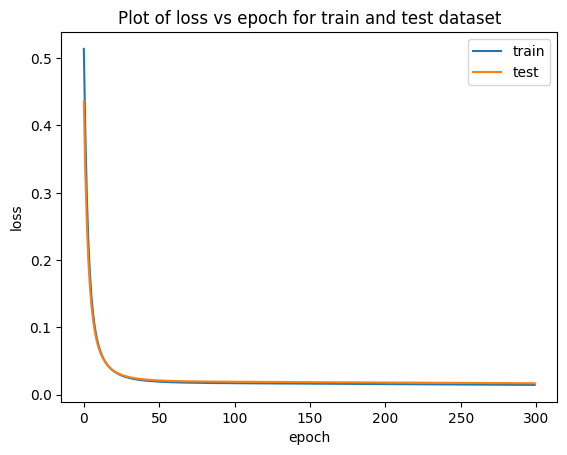

In [84]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # Plot of loss vs epoch of train and test dataset
  plt.plot(his['loss'])
  plt.plot(his['val_loss'])
  plt.title("Plot of loss vs epoch for train and test dataset")
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper right')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/ae_classifier_binary_loss.png')
  plt.show()

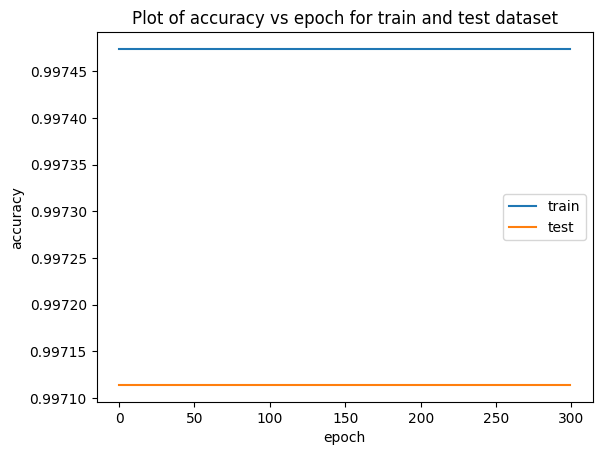

In [85]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # Plot of accuracy vs epoch of train and test dataset
  plt.plot(his['accuracy'])
  plt.plot(his['val_accuracy'])
  plt.title("Plot of accuracy vs epoch for train and test dataset")
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/ae_classifier_binary_accuracy.png')
  plt.show()

In [86]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  y_pred = ae_classifier.predict(X_test).ravel()
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  #auc = auc(fpr, tpr)

217/217 [==============================] - 0s 1ms/step


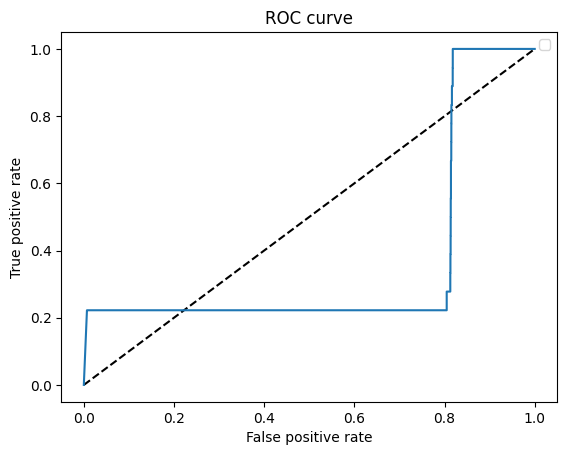

In [87]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  plt.plot([0, 1], [0, 1], 'k--')
  #plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
  plt.plot(fpr, tpr)
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.title('ROC curve')
  plt.legend(loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/ae_binary_roc.png')
  plt.show()

In [88]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  pred = ae_classifier.predict(X_test)
  y_classes = (ae_classifier.predict(X_test)>0.5).astype('int32')

217/217 [==============================] - 0s 1ms/step


In [89]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  print("Recall Score - ",recall_score(y_test,y_classes))
  print("F1 Score - ",f1_score(y_test,y_classes))
  print("Precision Score - ",precision_score(y_test,y_classes))
  fpr, fnr, thresholds = det_curve(y_test, y_classes)
  print("False Positive Rate - ", fpr)
  print("False Negative Rate - ", fnr)
  print("Thresholds - ", thresholds)

Recall Score -  0.2222222222222222
F1 Score -  0.0016501650165016504
Precision Score -  0.0008281573498964803
False Positive Rate -  [1.        0.6984081]
False Negative Rate -  [0.         0.77777778]
Thresholds -  [0 1]


              precision    recall  f1-score   support

           0       0.99      0.30      0.46      6910
           1       0.00      0.22      0.00        18

    accuracy                           0.30      6928
   macro avg       0.50      0.26      0.23      6928
weighted avg       0.99      0.30      0.46      6928



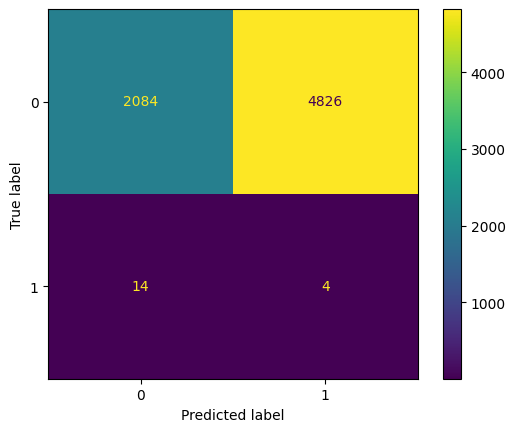

In [90]:
print(classification_report(y_test, y_classes, target_names=['0', '1']))
cm = confusion_matrix(y_test, y_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['0', '1'])
disp.plot()

plt.show()